<a href="https://colab.research.google.com/github/ramenwang/deep_learning_py/blob/master/Coursera/NLP/Sarcasm_data_play_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# download sarcasm dataset
! wget http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json /tmp/sarcasm.json

--2020-03-11 12:59:53--  http://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  19.6MB/s    in 0.3s    

2020-03-11 12:59:54 (19.6 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]

/tmp/sarcasm.json: Scheme missing.
FINISHED --2020-03-11 12:59:54--
Total wall clock time: 0.7s
Downloaded: 1 files, 5.4M in 0.3s (19.6 MB/s)


In [0]:
# load data

urls, headers, targets = [], [], []
with open('sarcasm.json', 'r') as jsonfile:
    js_reader = json.load(jsonfile)
    for rows in js_reader:
        urls.append(rows['article_link'])
        headers.append(rows['headline'])
        targets.append(rows['is_sarcastic'])

In [0]:
# set up hyperparamters
vec_size = 1000
embedding_dim = 16
seq_len = 32
oov_word = '<OOV>'
training_rate = 0.7

In [0]:
# build a token
tokenizer = Tokenizer(num_words=vec_size, oov_token=oov_word)

In [0]:
# fit a tokenizer
tokenizer.fit_on_texts(headers)
word_index = tokenizer.word_index

In [7]:
# get sequences
sequences = tokenizer.texts_to_sequences(headers)
padded = pad_sequences(sequences, maxlen=seq_len, padding='post', truncating='post')
padded[0]

array([308,   1, 679,   1,   1,  48, 382,   1,   1,   6,   1,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0], dtype=int32)

In [0]:
# split training and testing dataset
import numpy as np

sampler = np.random.uniform(size=len(padded))
X_train, y_train = padded[sampler < training_rate], np.array(targets)[sampler < training_rate]
X_test, y_test = padded[sampler > training_rate], np.array(targets)[sampler > training_rate]

In [9]:
# create a function for inverse the tokenizer
inverse_index = {value: key for key, value in word_index.items()}

def inverse_token(tokenized):
    return inverse_index.get(tokenized, '?')

def inverse_sequence(sequences):
    return ' '.join([inverse_token(i) for i in sequences])

print(sequences[0])
print(inverse_sequence(sequences[0]))

[308, 1, 679, 1, 1, 48, 382, 1, 1, 6, 1, 1]
former <OOV> store <OOV> <OOV> over secret <OOV> <OOV> for <OOV> <OOV>


In [0]:
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vec_size, output_dim=embedding_dim, input_length=seq_len),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            16000     
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 16,497
Trainable params: 16,465
Non-trainable params: 32
___________________________________________________

In [14]:
fit_history = model.fit(x=X_train, y=y_train, batch_size=40, epochs=50,
                        validation_data=(X_test, y_test))

Train on 18655 samples, validate on 8054 samples
Epoch 1/50
18655/18655 [==============================] - 3s 177us/sample - loss: 0.5563 - acc: 0.7003 - val_loss: 0.5284 - val_acc: 0.7640
Epoch 2/50
18655/18655 [==============================] - 3s 160us/sample - loss: 0.4797 - acc: 0.7671 - val_loss: 0.4490 - val_acc: 0.7837
Epoch 3/50
18655/18655 [==============================] - 3s 157us/sample - loss: 0.4480 - acc: 0.7846 - val_loss: 0.4283 - val_acc: 0.8012
Epoch 4/50
18655/18655 [==============================] - 3s 160us/sample - loss: 0.4271 - acc: 0.8026 - val_loss: 0.4250 - val_acc: 0.8013
Epoch 5/50
18655/18655 [==============================] - 3s 159us/sample - loss: 0.4192 - acc: 0.8009 - val_loss: 0.4219 - val_acc: 0.8006
Epoch 6/50
18655/18655 [==============================] - 3s 160us/sample - loss: 0.4132 - acc: 0.8078 - val_loss: 0.4194 - val_acc: 0.8042
Epoch 7/50
18655/18655 [==============================] - 3s 161us/sample - loss: 0.4045 - acc: 0.8149 - val_lo

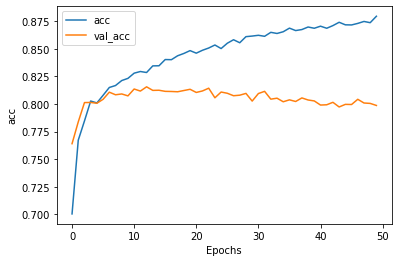

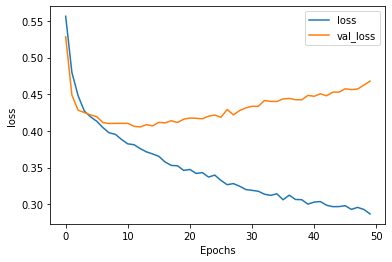

In [16]:
import matplotlib.pyplot as plt

def plot_fit_hist(fit_history, name_space):
    plt.plot(fit_history.history[name_space])
    plt.plot(fit_history.history['val_'+name_space])
    plt.xlabel('Epochs')
    plt.ylabel(name_space)
    plt.legend([name_space, 'val_'+name_space])
    plt.show()

plot_fit_hist(fit_history, 'acc')
plot_fit_hist(fit_history, 'loss')

In [0]:
embedding_lyr = model.layers[0]

In [48]:
embedding_w = embedding_lyr.get_weights()[0]
embedding_w.shape

(10000, 16)

In [0]:
# get embedding vectors
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vec_size):
  word = inverse_token(word_num)
  embeddings = embedding_w[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
# download
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')